In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from math import sqrt

import datetime as dt
import time as tm

# 1-1데이터 불러오기

In [409]:
# data : 단일 변수들 관의 관계 분석, 그래프 파악을 위해 준비
# data_mul : 다중 변수들의 관계 분석, 선형회귀분석을 위해 준비.
# data_air : 단순 공기속 성분들의 관계를 위해 준비.

data = pd.read_csv('Measurement_summary.csv')
data_mul = pd.read_csv('Measurement_summary.csv')
data_air = pd.read_csv('Measurement_summary.csv')

# 1-2. 데이터의 기본 정보 확인

In [410]:
print(data, "\n")
print(data.head(), "\n")
print(data.info(), "\n")
print(data.describe(), "\n")
print(data.columns)

        Measurement date  Station code  \
0       2017-01-01 00:00           101   
1       2017-01-01 01:00           101   
2       2017-01-01 02:00           101   
3       2017-01-01 03:00           101   
4       2017-01-01 04:00           101   
...                  ...           ...   
647506  2019-12-31 19:00           125   
647507  2019-12-31 20:00           125   
647508  2019-12-31 21:00           125   
647509  2019-12-31 22:00           125   
647510  2019-12-31 23:00           125   

                                                  Address   Latitude  \
0       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
1       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
2       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
3       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
4       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
...                                                   ...      

# 1-3. 데이터 결측치 확인

In [411]:
print(data.isna().sum(),"\n") 

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64 



# 1-4. 일부 변수 데이터 확인

In [412]:
print(data['Measurement date'].head(), "\n")
print(data['Measurement date'].tail(), "\n")

0    2017-01-01 00:00
1    2017-01-01 01:00
2    2017-01-01 02:00
3    2017-01-01 03:00
4    2017-01-01 04:00
Name: Measurement date, dtype: object 

647506    2019-12-31 19:00
647507    2019-12-31 20:00
647508    2019-12-31 21:00
647509    2019-12-31 22:00
647510    2019-12-31 23:00
Name: Measurement date, dtype: object 



In [413]:
print(data['Station code'].value_counts(), "\n")
print(data['Address'].value_counts(), "\n")
print(data['Latitude'].value_counts(), "\n")
print(data['Longitude'].value_counts(), "\n")
print(data['SO2'].value_counts(), "\n")
print(data['NO2'].value_counts(), "\n")
print(data['O3'].value_counts(), "\n")
print(data['CO'].value_counts(), "\n")
print(data['PM10'].value_counts(), "\n")
print(data['PM2.5'].value_counts(), "\n")

116    25906
110    25906
101    25905
114    25905
124    25905
122    25905
106    25905
121    25905
111    25905
102    25905
123    25904
118    25904
115    25904
125    25904
109    25904
103    25904
104    25896
108    25894
119    25894
120    25894
112    25892
117    25892
113    25892
107    25891
105    25890
Name: Station code, dtype: int64 

71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea        25906
369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea             25906
19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea            25905
17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea            25905
236, Baekjegobun-ro, Songpa-gu, Seoul, Republic of Korea             25905
16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Republic of Korea          25905
10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea                25905
14, Sillimdong-gil, Gwanak-gu, Seoul, Republic of Korea              25905
70, Samyang-ro 2-gil, Seongbuk-gu, Seoul

# 2. Preprocessing

# 2-1. 시간처리

In [414]:
print(data[data['Measurement date'].str.contains("2017")].value_counts())
print(data[data['Measurement date'].str.contains("2018")].value_counts())
print(data[data['Measurement date'].str.contains("2019")].value_counts())

#2017, 219000개. 2018, 219000개. 2019, 209511개.
#방대한 자료를 분리해야 함.

Measurement date  Station code  Address                                                            Latitude   Longitude   SO2    NO2    O3     CO   PM10   PM2.5
2017-01-01 00:00  101           19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea          37.572016  127.005008  0.004  0.059  0.002  1.2  73.0   57.0     1
2017-09-01 07:00  118           20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Republic of Korea       37.452357  126.908296  0.002  0.017  0.022  0.3  14.0   5.0      1
                  120           6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Republic of Korea         37.480917  126.971481  0.003  0.024  0.017  0.3  10.0   4.0      1
                  121           14, Sillimdong-gil, Gwanak-gu, Seoul, Republic of Korea            37.487355  126.927102  0.004  0.026  0.010  0.3  17.0   6.0      1
                  122           16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Republic of Korea        37.504547  126.994458  0.004  0.016  0.015  0.4  13.0   3.0      1
         

In [415]:
data['Measurement date'] = pd.to_datetime(data['Measurement date'])
data['Year'] = data['Measurement date'].dt.year
data['Month'] = data['Measurement date'].dt.month
data['Day'] = data['Measurement date'].dt.day
data['Hour'] = data['Measurement date'].dt.hour
data = data.drop(["Measurement date"],axis=1, inplace=False)
print(data.head(), "\n")
print(data.tail(), "\n")
print(data.info())

   Station code                                            Address   Latitude  \
0           101  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
1           101  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
2           101  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
3           101  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
4           101  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   

    Longitude    SO2    NO2     O3   CO  PM10  PM2.5  Year  Month  Day  Hour  
0  127.005008  0.004  0.059  0.002  1.2  73.0   57.0  2017      1    1     0  
1  127.005008  0.004  0.058  0.002  1.2  71.0   59.0  2017      1    1     1  
2  127.005008  0.004  0.056  0.002  1.2  70.0   59.0  2017      1    1     2  
3  127.005008  0.004  0.056  0.002  1.2  70.0   58.0  2017      1    1     3  
4  127.005008  0.003  0.051  0.002  1.2  69.0   61.0  2017      1    1     4   

        Station code                 

In [416]:
data_air['Measurement date'] = pd.to_datetime(data_air['Measurement date'])
data_air['Year'] = data_air['Measurement date'].dt.year
data_air['Month'] = data_air['Measurement date'].dt.month
data_air['Day'] = data_air['Measurement date'].dt.day
data_air['Hour'] = data_air['Measurement date'].dt.hour
data_air = data_air.drop(["Measurement date"],axis=1, inplace=False)

# 2-2. 동일 변수 처리 생성

In [417]:
data = data.drop(["Address", "Latitude", "Longitude"],axis=1, inplace=False)
print(data.info())
print(data.head(), "\n")
print(data.columns)
# Measurement date를 연, 월, 일, 시 로 나눈 것.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Station code  647511 non-null  int64  
 1   SO2           647511 non-null  float64
 2   NO2           647511 non-null  float64
 3   O3            647511 non-null  float64
 4   CO            647511 non-null  float64
 5   PM10          647511 non-null  float64
 6   PM2.5         647511 non-null  float64
 7   Year          647511 non-null  int64  
 8   Month         647511 non-null  int64  
 9   Day           647511 non-null  int64  
 10  Hour          647511 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 54.3 MB
None
   Station code    SO2    NO2     O3   CO  PM10  PM2.5  Year  Month  Day  Hour
0           101  0.004  0.059  0.002  1.2  73.0   57.0  2017      1    1     0
1           101  0.004  0.058  0.002  1.2  71.0   59.0  2017      1    1     1
2           101  0.004  

In [418]:
data_mul = data_mul.drop(["Address", "Latitude", "Longitude"],axis=1, inplace=False)
print(data_mul.info())

# Measurement를 그대로 사용.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   SO2               647511 non-null  float64
 3   NO2               647511 non-null  float64
 4   O3                647511 non-null  float64
 5   CO                647511 non-null  float64
 6   PM10              647511 non-null  float64
 7   PM2.5             647511 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 39.5+ MB
None


In [419]:
data_air = data_air.drop(["Address", "Latitude", "Longitude", "Station code"],axis=1, inplace=False)

# 2-3 수치형 변수에 대한 히스토그램

C:\Users\chaeo\AppData\Local\Temp/ipykernel_15920/2246767130.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data[numerical_columns].hist(ax=ax)


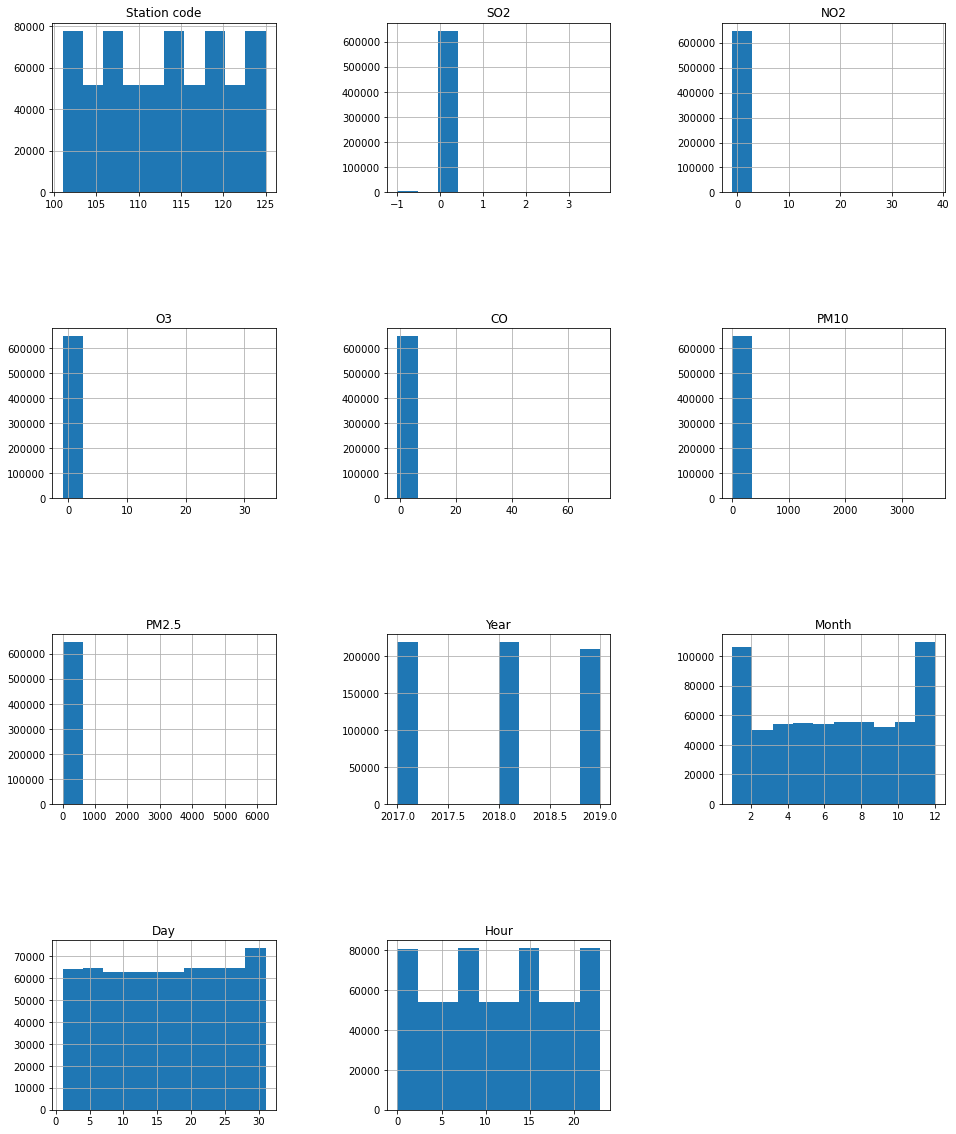

In [420]:
numerical_columns = ['Station code', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5', 'Year',
       'Month', 'Day', 'Hour']
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
data[numerical_columns].hist(ax=ax)
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.show()

# 2-4-1 Data_mul 분석

   Measurement date    SO2    NO2     O3   CO  PM10  PM2.5
0                 0  0.004  0.059  0.002  1.2  73.0   57.0
1                 1  0.004  0.058  0.002  1.2  71.0   59.0
2                 2  0.004  0.056  0.002  1.2  70.0   59.0
3                 3  0.004  0.056  0.002  1.2  70.0   58.0
4                 4  0.003  0.051  0.002  1.2  69.0   61.0


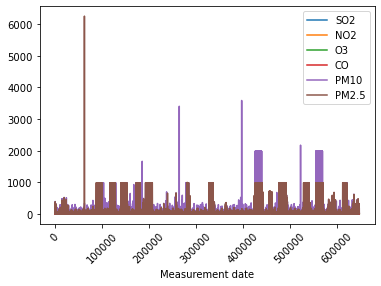

In [421]:
data_mul['Measurement date']=range(len(data))
data_mul = data_mul.groupby(['Measurement date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 
        'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
print(data_mul.head())
data_mul.plot(x='Measurement date')
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.xticks(rotation =45)
plt.show()

# 위의 코드, data_mul['Measurement date'] = range(len(data))를 주석 처리 할 경우, 아래 x 측을 단순 시간으로 확인 가능.

# 2-4-2. data의 month 그룹 그래프

   Month       SO2       NO2        O3        CO       PM10      PM2.5
0      1  0.004101  0.034953  0.012058  0.694777  59.450578  35.151950
1      2  0.001076  0.030486  0.013451  0.637079  52.757599  32.366468
2      3 -0.001083  0.032783  0.022926  0.584204  61.500099  40.796490
3      4  0.003021  0.029384  0.030441  0.478092  50.501028  25.538175
4      5  0.003237  0.025738  0.036532  0.453119  54.043716  26.553208


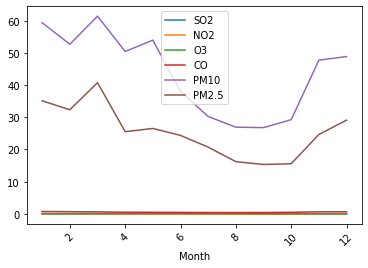

In [422]:
data = data.groupby(['Month'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', #Year -> Month
        'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
print(data.head())
data.plot(x='Month') #Year -> Month
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.xticks(rotation =45)
plt.show()

# 2-5 각 case 별 상관계수 히트맵

# 2-5-1 Data_mul 히트맵

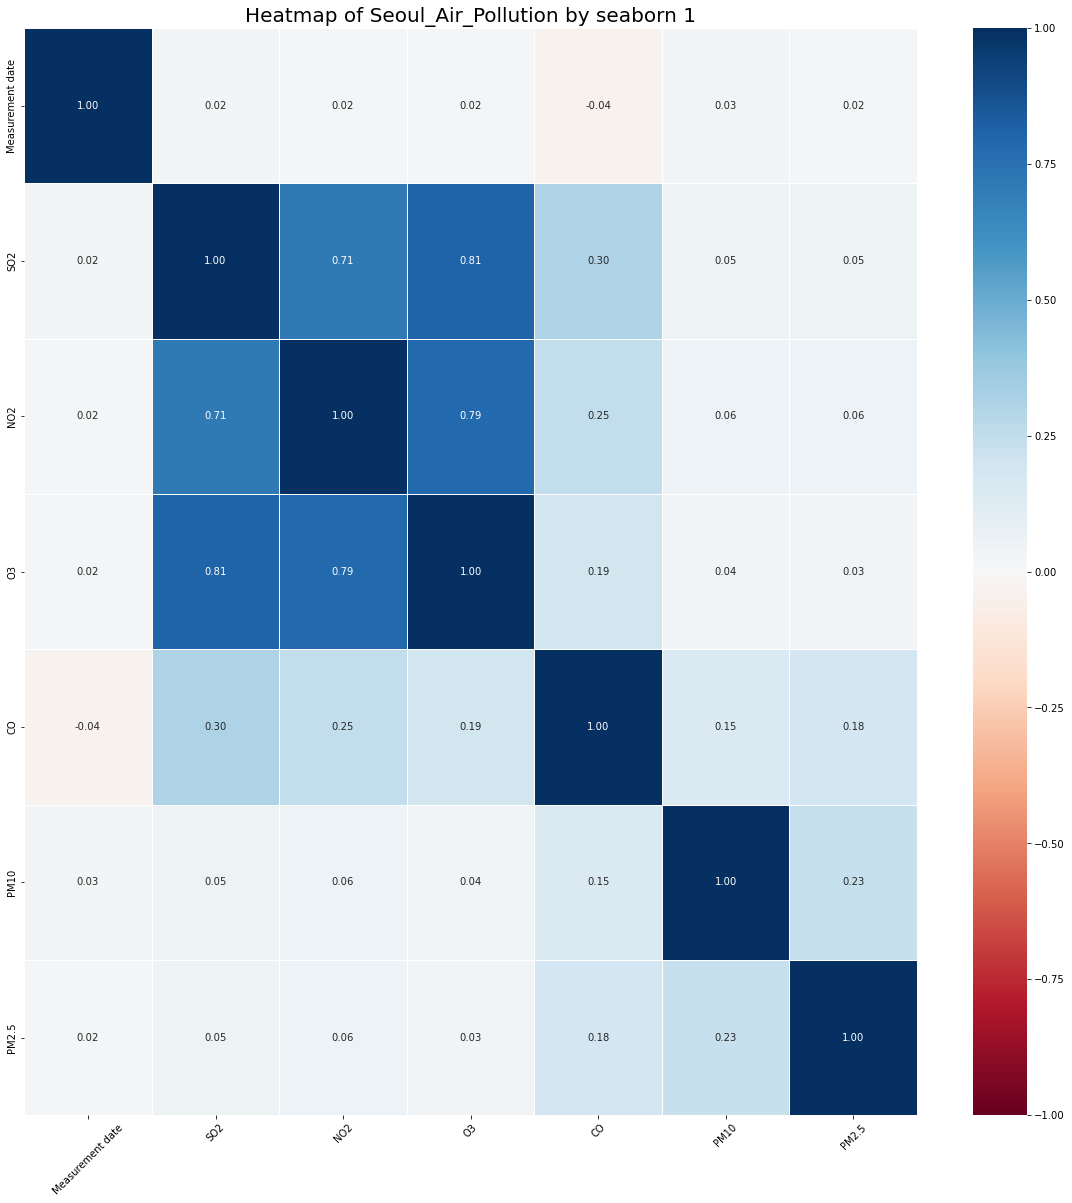

In [423]:
plt.figure(figsize=(20,20))
sns.heatmap(data_mul.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='RdBu')
plt.title('Heatmap of Seoul_Air_Pollution by seaborn 1', fontsize = 20)
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.xticks(rotation =45)
plt.show()

# 2-5-2 data의 히트맵

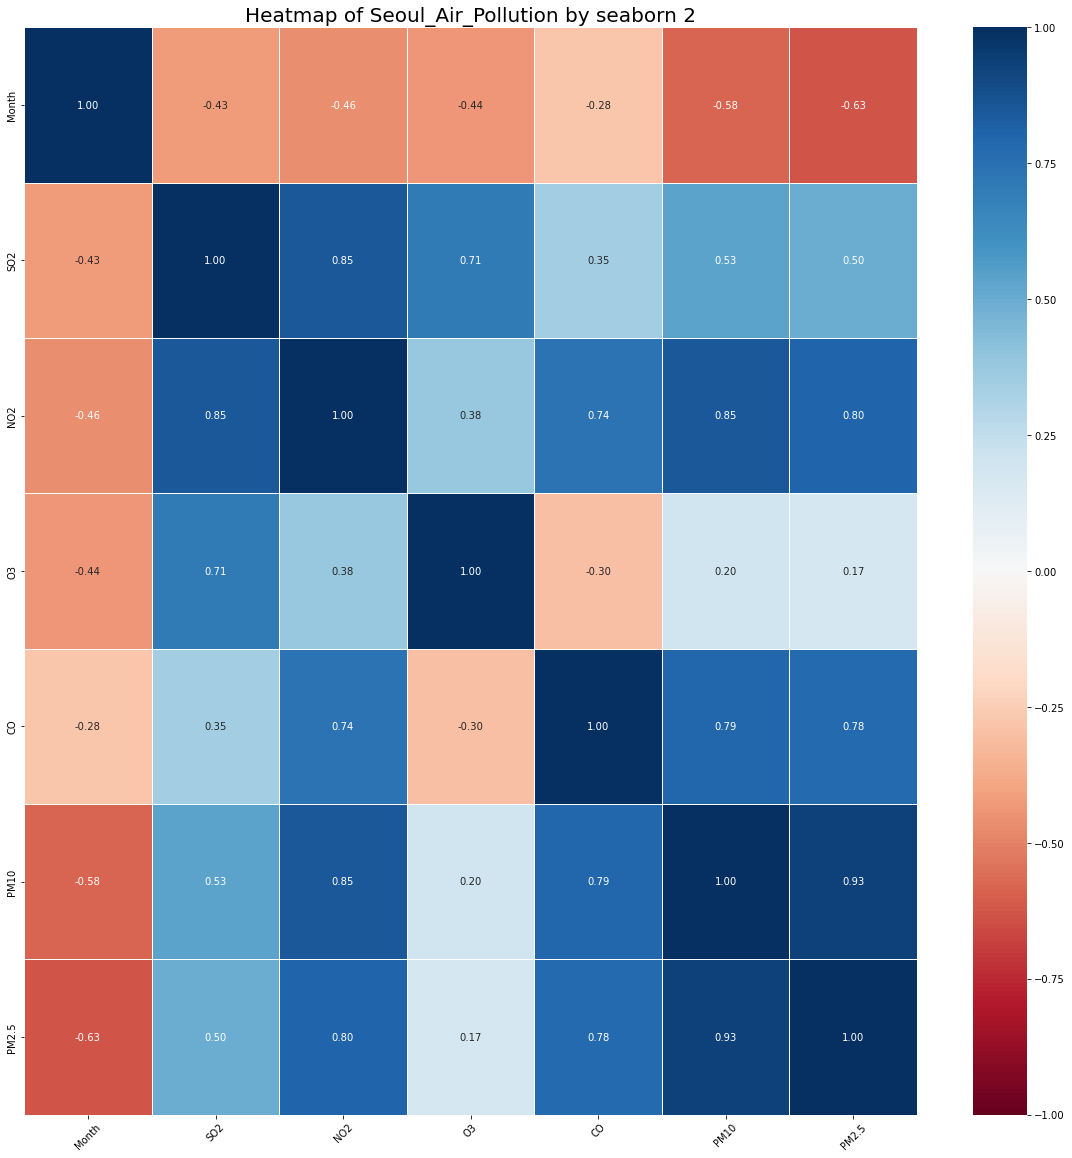

In [424]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='RdBu')
plt.title('Heatmap of Seoul_Air_Pollution by seaborn 2', fontsize = 20)
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.xticks(rotation =45)
plt.show()

#상관계수적으로는 분명 2-5-2, 즉 단일데이터 분석을 위해 준비한 data의 상관계수맵이 더 유용하다. 허나 이는 "달"에 group을 새롭게 만든 결과물로 학습을 시킬 경우, 1년 즉 12개의 샘플만을 가지고 학습과 테스트가 진행되어 회귀분석에는 적합하지 못하다.

# 2-5-3 Data_air 의 히트맵

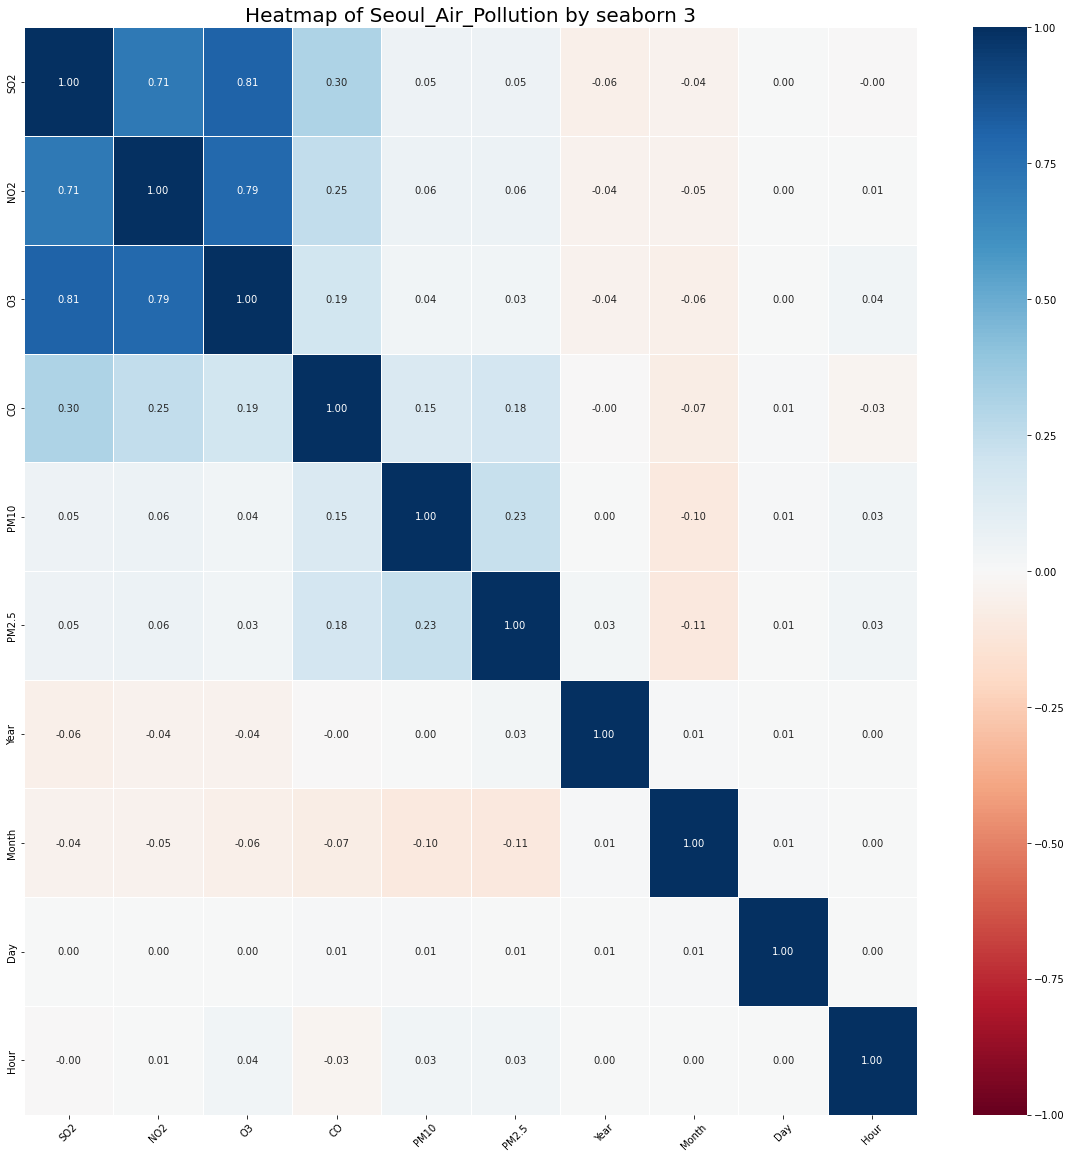

In [425]:

plt.figure(figsize=(20,20))
sns.heatmap(data_air.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='RdBu')
plt.title('Heatmap of Seoul_Air_Pollution by seaborn 3', fontsize = 20)
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.xticks(rotation =45)
plt.show()

# 2-6 표준화_Standardization

# 2-6-1 data_mul

   Measurement date       SO2       NO2        O3        CO      PM10  \
0         -1.732048  0.073509  0.316809 -0.160902  1.704347  0.411766   
1         -1.732043  0.073509  0.308125 -0.160902  1.704347  0.383652   
2         -1.732037  0.073509  0.290757 -0.160902  1.704347  0.369594   
3         -1.732032  0.073509  0.290757 -0.160902  1.704347  0.369594   
4         -1.732027  0.060824  0.247336 -0.160902  1.704347  0.355537   

      PM2.5  
0  0.719142  
1  0.764675  
2  0.764675  
3  0.741909  
4  0.810207  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  float64
 1   SO2               647511 non-null  float64
 2   NO2               647511 non-null  float64
 3   O3                647511 non-null  float64
 4   CO                647511 non-null  float64
 5   PM10              647511 n

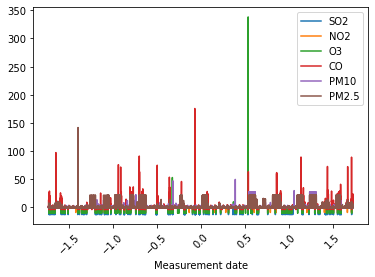

In [382]:
data_mul1 =data_mul

scaler = StandardScaler()

scale_columns = data_mul1.columns
data_mul1[scale_columns] = scaler.fit_transform(data_mul1[scale_columns])
print(data_mul1.head())
print(data_mul1.info())

data_mul1.plot(x='Measurement date') #Year -> Month
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.xticks(rotation =45)
plt.show()

# 2-6-2 data

      Month       SO2       NO2        O3        CO      PM10     PM2.5
0 -1.593255  0.729087  1.077016 -0.457821  1.681441  1.262359  1.257811
1 -1.303572  0.358160  0.689012 -0.349845  1.156549  0.720441  0.893457
2 -1.013890  0.093273  0.888566  0.384937  0.675523  1.428306  1.996142
3 -0.724207  0.596639  0.593299  0.967748 -0.289804  0.537730  0.000285
4 -0.434524  0.623150  0.276680  1.440094 -0.516991  0.824575  0.133056
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   12 non-null     float64
 1   SO2     12 non-null     float64
 2   NO2     12 non-null     float64
 3   O3      12 non-null     float64
 4   CO      12 non-null     float64
 5   PM10    12 non-null     float64
 6   PM2.5   12 non-null     float64
dtypes: float64(7)
memory usage: 800.0 bytes
None


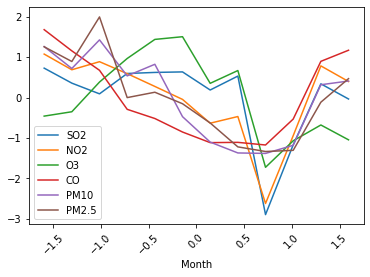

In [383]:
data1 = data

scaler = StandardScaler()

scale_columns = data1.columns
data1[scale_columns] = scaler.fit_transform(data1[scale_columns])
print(data1.head())
print(data1.info())

data1.plot(x='Month') #Year -> Month
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.xticks(rotation =45)
plt.show()

# 2-6-3 data_air의 표준화

In [384]:
data_air1 = data_air

scaler = StandardScaler()

scale_columns = data_air1.columns
data_air1[scale_columns] = scaler.fit_transform(data_air1[scale_columns])
print(data_air1.head())
print(data_air1.info())

        SO2       NO2        O3        CO      PM10     PM2.5      Year  \
0  0.073509  0.316809 -0.160902  1.704347  0.411766  0.719142 -1.211439   
1  0.073509  0.308125 -0.160902  1.704347  0.383652  0.764675 -1.211439   
2  0.073509  0.290757 -0.160902  1.704347  0.369594  0.764675 -1.211439   
3  0.073509  0.290757 -0.160902  1.704347  0.369594  0.741909 -1.211439   
4  0.060824  0.247336 -0.160902  1.704347  0.355537  0.810207 -1.211439   

      Month       Day      Hour  
0 -1.607449 -1.672947 -1.662429  
1 -1.607449 -1.672947 -1.517900  
2 -1.607449 -1.672947 -1.373371  
3 -1.607449 -1.672947 -1.228842  
4 -1.607449 -1.672947 -1.084312  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   SO2     647511 non-null  float64
 1   NO2     647511 non-null  float64
 2   O3      647511 non-null  float64
 3   CO      647511 non-null  float64
 4   P

# 3. 다중선형회귀분석

# 3-1-1 data_mul 모델 분리

In [426]:
X_columns = ['NO2', 'O3']
X = data_mul[X_columns]
Y = data_mul['SO2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=151515)

In [427]:
print("데이터 분리 결과 확인","\n")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

데이터 분리 결과 확인 

(453257, 2) (453257,)
(194254, 2) (194254,)


# 3-1-2 다중공선성 확인

In [428]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("다중공선성 확인","\n")
print(vif.round(1))

다중공선성 확인 

  features  VIF Factor
0      NO2         2.5
1       O3         2.5


# 3-1-3 모델링

In [429]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)
pred_test = lr.predict(X_test)
print("모델링 결과 ","\n")
print(lr.coef_,"\n")
print(lr.score(X_train, Y_train),"\n")

모델링 결과  

[0.02853803 0.69415493] 

0.7249614180838477 



# 3-1-4 모델 해석

In [430]:
X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(Y_train, X_train2).fit()

print("모델의 해석","\n")
print(model2.summary(),"\n")

모델의 해석 

                            OLS Regression Results                            
Dep. Variable:                    SO2   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 5.974e+05
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        10:46:44   Log-Likelihood:             8.0114e+05
No. Observations:              453257   AIC:                        -1.602e+06
Df Residuals:                  453254   BIC:                        -1.602e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0149   6.26e-05   -238.019

C:\Users\chaeo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# 3-1-5 모델 예측, 가중치 해석

In [431]:
print("모델의 가중치","\n")
print(lr.intercept_,"\n")

모델의 가중치 

-0.014900497129796913 



# 3-1-6 모델 테스트

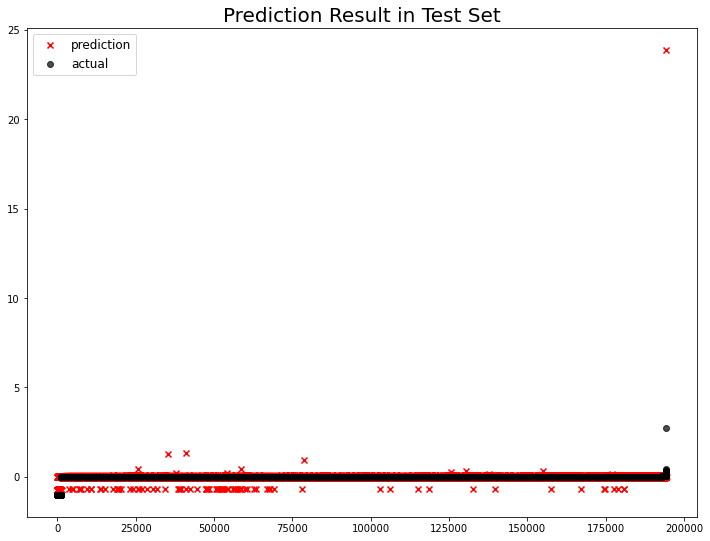

In [432]:
df = pd.DataFrame({'actual': Y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

# 3-1-7 RMSE 확인 

In [433]:
# training set
pred_train = lr.predict(X_train)
print('-'*10,'Training error','-'*10)
print(sqrt(mean_squared_error(Y_train, pred_train)))

# test set
print('-'*10,'Test error','-'*10)
print(sqrt(mean_squared_error(Y_test, pred_test)))

---------- Training error ----------
0.04131843947989066
---------- Test error ----------
0.05813801404525176


# 3-2-1 data 모델 분리

In [434]:
X_columns = ["Month", "SO2", "NO2", "CO", "PM10"] # p-value "NO2", "CO", "PM10"
X = data[X_columns]
Y = data['PM2.5']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=151515)

In [435]:
print("데이터 분리 결과 확인","\n")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

데이터 분리 결과 확인 

(8, 5) (8,)
(4, 5) (4,)


# 3-2-2 data 다중공선성 확인

In [436]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("다중공선성 확인","\n")
print(vif.round(1))

다중공선성 확인 

  features  VIF Factor
0    Month         5.4
1      SO2         2.1
2      NO2       350.3
3       CO       172.9
4     PM10       325.5


# 3-2-3 data 모델링

In [437]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)
pred_test = lr.predict(X_test)
print("모델링 결과 ","\n")
print(lr.coef_,"\n")
print(lr.score(X_train, Y_train),"\n")

모델링 결과  

[-1.71713050e-01 -9.78118775e+01 -6.90929073e+02 -1.35723233e+01
  1.07339927e+00] 

0.9988231998586405 



# 3-2-4 data 모델 해석

In [438]:
X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(Y_train, X_train2).fit()

print("모델의 해석","\n")
print(model2.summary(),"\n")


모델의 해석 

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     339.5
Date:                Sun, 29 May 2022   Prob (F-statistic):            0.00294
Time:                        10:46:53   Log-Likelihood:               -0.50011
No. Observations:                   8   AIC:                             13.00
Df Residuals:                       2   BIC:                             13.48
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6893      1.772      3.211

C:\Users\chaeo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\chaeo\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 3-2-5 data 모델 예측, 가중치 해석

In [439]:
print("모델의 가중치","\n")
print(lr.intercept_,"\n")

모델의 가중치 

5.689256682837463 



# 3-2-6 모델 테스트

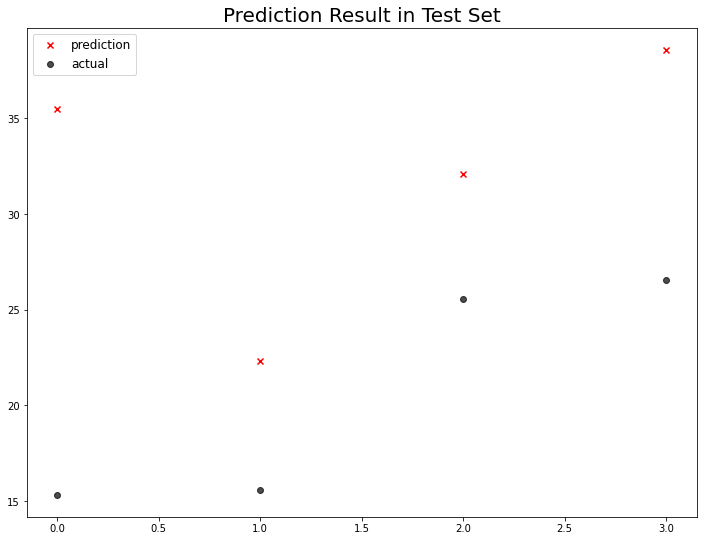

In [440]:
df = pd.DataFrame({'actual': Y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()


# 3-2-7 RMSE 확인

In [441]:
pred_train = lr.predict(X_train)
print('-'*10,'Training error','-'*10)
print(sqrt(mean_squared_error(Y_train, pred_train)))

# test set
print('-'*10,'Test error','-'*10)
print(sqrt(mean_squared_error(Y_test, pred_test)))

---------- Training error ----------
0.257580077215915
---------- Test error ----------
12.646021837330911


# 3-3-1 data_air 모델 분리

In [442]:
X_columns = ['NO2', 'CO', 'O3']
X = data_air[X_columns]
Y = data_air['SO2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=151515)

print("데이터 분리 결과 확인","\n")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

데이터 분리 결과 확인 

(453257, 3) (453257,)
(194254, 3) (194254,)


# 3-3-2 data_air 다중공선성 확인

In [443]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("다중공선성 확인","\n")
print(vif.round(1))

다중공선성 확인 

  features  VIF Factor
0      NO2         2.5
1       CO         1.1
2       O3         2.5


# 3-3-3 data_air 모델링

In [444]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)
pred_test = lr.predict(X_test)
print("모델링 결과 ","\n")
print(lr.coef_,"\n")
print(lr.score(X_train, Y_train),"\n")

모델링 결과  

[0.01406212 0.02498105 0.68691929] 

0.7415127993930655 



# 3-3-4 data_air 모델 해석

In [445]:
X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(Y_train, X_train2).fit()

print("모델의 해석","\n")
print(model2.summary(),"\n")


모델의 해석 

                            OLS Regression Results                            
Dep. Variable:                    SO2   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                 4.334e+05
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        10:46:56   Log-Likelihood:             8.1520e+05
No. Observations:              453257   AIC:                        -1.630e+06
Df Residuals:                  453253   BIC:                        -1.630e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0272   9.42e-05   -288.497

C:\Users\chaeo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# 3-3-5 data_air 모델 예측, 가중치 해석

In [446]:
print("모델의 가중치","\n")
print(lr.intercept_,"\n")

모델의 가중치 

-0.027166101801769656 



# 3-3-6 air 모델 테스트

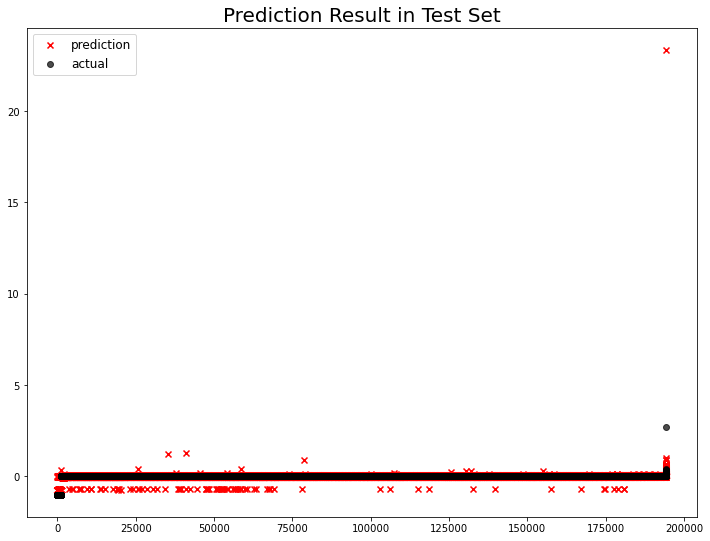

In [447]:
df = pd.DataFrame({'actual': Y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()


# 3-3-7 air RMSE 확인

In [448]:
pred_train = lr.predict(X_train)
print('-'*10,'Training error','-'*10)
print(sqrt(mean_squared_error(Y_train, pred_train)))

# test set
print('-'*10,'Test error','-'*10)
print(sqrt(mean_squared_error(Y_test, pred_test)))

---------- Training error ----------
0.04005591180769891
---------- Test error ----------
0.056573244521574875
